# Grafici dati presi le scorse volte

> e anche questa in realtà

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path


plt.style.use("seaborn")

file_names = Path("./data")
names = ["lambda", "transmittance"]
lmbd = r"$\lambda$ [nm]"
Trans = names[1].capitalize()


/tmp/ipykernel_11000/4286732907.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


## Fondo dovuto ad aria

Text(0, 0.5, 'Transmittance')

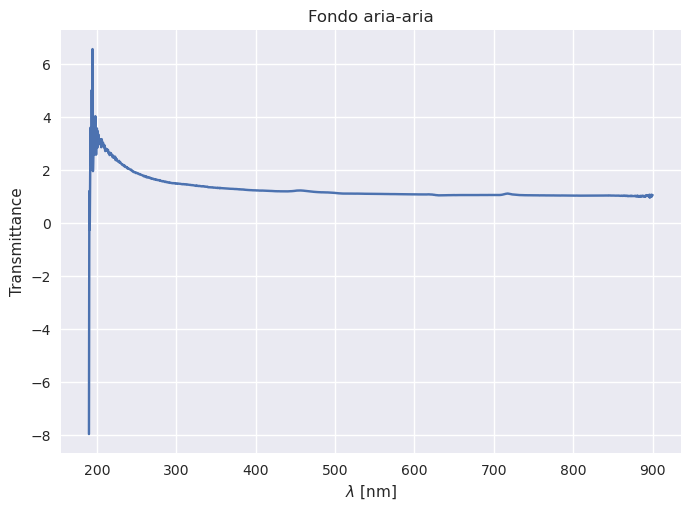

In [17]:
zeroair = pd.read_table("data/trasm_900_190_zeroair_1.txt", names=names, skiprows=75)
plt.plot(*names, data=zeroair)
plt.title("Fondo aria-aria")
plt.xlabel(lmbd)
plt.ylabel(Trans)


## Spettro del vetro riferito ad aria

Text(0, 0.5, 'Transmittance')

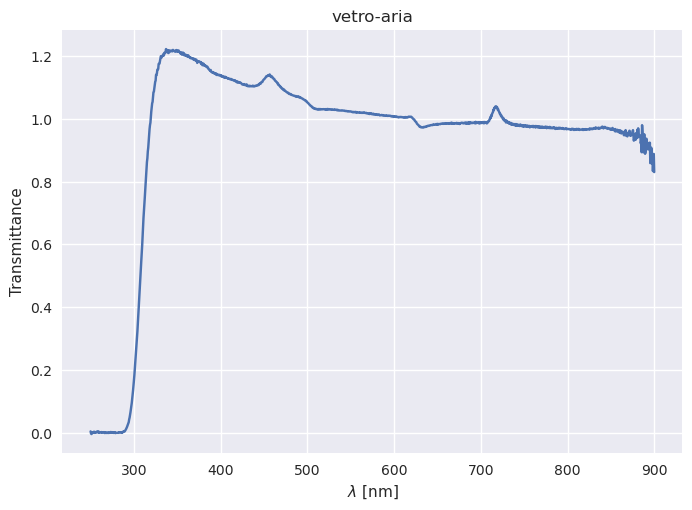

In [18]:
vetro_aria = pd.read_table("data/trasm_900_250_vetro_1.txt", names=names, skiprows=75)
plt.plot(*names, data=vetro_aria)
plt.title("vetro-aria")
plt.xlabel(lmbd)
plt.ylabel(Trans)


Text(0, 0.5, 'Transmittance')

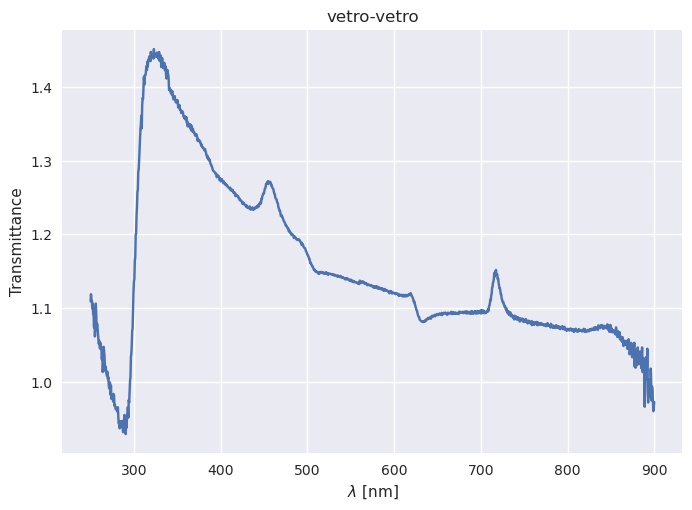

In [19]:
vetro_vetro = pd.read_table(
    "data/trasm_900_250_vetro_vetro_1.txt", names=names, skiprows=75
)
plt.plot(*names, data=vetro_vetro)
plt.title("vetro-vetro")
plt.xlabel(lmbd)
plt.ylabel(Trans)


## Spettro dovuto all'oro riferito a vetro

Text(0, 0.5, 'Transmittance')

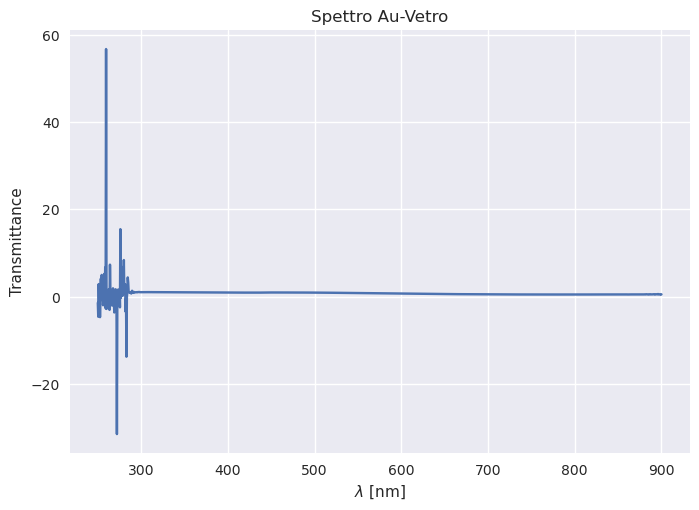

In [20]:
vetroAU_vetro = pd.read_table(
    "data/trasm_900_250_AuVetroSample_VetroRef.txt", names=names, skiprows=75
)
plt.plot(*names, data=vetroAU_vetro)
plt.title("Spettro Au-Vetro")
plt.xlabel(lmbd)
plt.ylabel(Trans)


## Spettro dell'oro riferito ad aria

Questa misura per quanto spiegato dalla Fra in realtà non sarebbe molto utile aggiungendo oltre agli effetti dell'aria anche i problemi dovuti al vetro

Text(0, 0.5, 'Transmittance')

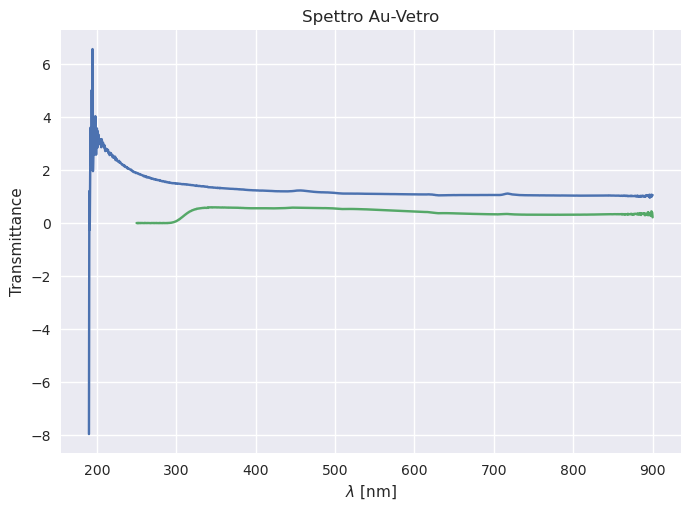

In [21]:
vetroAU_aria = pd.read_table(
    "data/trasm_900_250_AuVetroSample_AriaRef.txt", names=names, skiprows=75
)
plt.plot(*names, data=zeroair)
plt.plot(*names, data=vetroAU_aria)

plt.title("Spettro Au-Vetro")
plt.xlabel(lmbd)
plt.ylabel(Trans)

# plt.plot(vetroAU_aria[:,0], vetroAU_aria[:,1] / zeroair[:1301, 1])


In [22]:
## Test di varie combinazioni... cambio anche interfaccia alla librearia grafica
## Nel senso che uso ancora matplotlib... ma invece che chiamarlo direttamente uso seaborn...
## Perchè? Perchè è come passare da un auto manuale ad una automatica.. non ho voglia di specificare ogni volta dei parametri uguali e con seaborn c'è un trucco per evitare di dichiararli

# # sns.lineplot(data = vetroAU_vetro, x = names[0], y = names[1] )
# sns.lineplot(data = vetroAU_aria, x = names[0], y = names[1] )
# sns.lineplot(data = vetro_aria, x = names[0], y = names[1] )
# sns.lineplot(data = zeroair[zeroair["lambda"]>250], x = names[0], y = names[1] )

# plt.legend(["Oro-vetro","Oro-aria","Vetro-Aria","aria"])

Il test precendente ha evidenziato che quella libreria non serviva ancora al mio caso...
Nonostante introducesse cose molto carine a dirla tutta...
Proviamo altre strade... Continuando a guardare quella Beer-Lambert law...

$$
    T = \exp\left( - \sum_{i=1}^N \sigma_i \int_0^\mathcal l n_i(z)dz \right) = 10^{\left( - \sum_{i=1}^N \varepsilon_i \int_0^\mathcal l c_i(z)dz \right)}
$$

dove:
- $\mathcal l$ è il cammino ottico
- $\sigma_i$ è la sezione d'urto di assorbimento
- $n_i$ è la densità numerica della specie attenuante $i$ nel materiale
- $\varepsilon_i$ è il coefficente di attenuazione molare o l'assorbività della specie attenuante
- $c_i$ è la concentrazione della specie attenuante.

In generale la defizione di $T$ è:

$$
    T = \frac{\varPhi^t_e}{\varPhi^i_e} = \exp (-\tau) = 10^{-A}
$$

Ragioniamo invece su quello che noi abbiamo... Nella realtà noi non abbiamo mai il flusso di ingresso, ma facciamo il rapporto tra un flusso di riferimento (*reference*) e uno con il nostro campione (*sample*), quindi quello che noi abbiamo nella pratica sono 2 flussi trasmessi, quindi T diventa:

$$
    T_{meas} = \frac{\varPhi^t_{SAMPLE}}{\varPhi^t_{REFERENCE}}
$$

Ok, bene, concentriamoci su questi valori:

$$
\begin{gather}
    \varPhi^t_{SAMPLE} = T_{SAMPLE} \cdot \varPhi^i_{SAMPLE}\\
    \varPhi^t_{REFERENCE} = T_{REFERENCE} \cdot \varPhi^i_{REFERENCE}
\end{gather}
$$

Ok, ora la questione sembra farsi un po' più interessante, posso risfruttare la definizione di $T$ introducendo però i fattori di attenuazione:

$$
\begin{gather}
    T_{SAMPLE} = \exp{-(\tau_{Au} + \tau_{Air} + \tau{Glass})}\\
    T_{REFERENCE} = \exp{-(\tau_{Air} + \tau_{Glass})}
\end{gather}
$$

Inseriamo questi dati in $T_{meas}$:

$$
\begin{align}
    T_{meas} &= \frac{T_{SAMPLE}}{T_{REFERENCE}} \frac{\varPhi^i_{SAMPLE}}{\varPhi^i_{REFERENCE}}\\
    &= \frac{\exp \left( -(\tau_{Au} + \tau_{Air} + \tau_{Glass})\right)} {\exp\left(-(\tau_{Air} + \tau_{Glass})\right)} \frac{\varPhi^i_{SAMPLE}}{\varPhi^i_{REFERENCE}}\\
    &= \exp\left( -\tau_{Au} \right) \frac{\varPhi^i_{SAMPLE}}{\varPhi^i_{REFERENCE}}\\
    T_{meas} = T_{Au} \frac{\varPhi^i_{SAMPLE}}{\varPhi^i_{REFERENCE}}
\end{align}
$$

Ora il rapporto tra le incidenti lo misuriamo con zero air... e $T_{Au}$ è quello che effettivamente ci interessa.

Quindi basta fare una divisione... Nulla di che
